# Lab session 2: Adversarial Machine Learning

In [1]:
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_params = [dict(n_samples = 100,
                       centers = [[1, 2], [7, 5.5]],
                       cluster_std = 0.35),
                  dict(n_samples = 150,
                  centers = [[2, 0], [6, 4], [-2, 4]],
                  cluster_std = 0.8)]

**1. Plot data and the decision boundary for 2 classes**

/tmp/ipykernel_1456/3204488237.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')


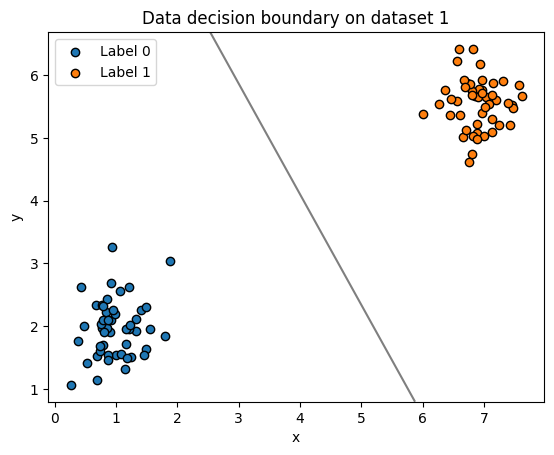

In [36]:
from sklearn.inspection import DecisionBoundaryDisplay
fig = plt.figure()


n_samples, centers, cluster_std = dataset_params[0].values()
X, y = make_blobs(n_samples = n_samples, centers = centers, cluster_std = cluster_std)
ax = fig.add_subplot(1, 1, 1)

clf = svm.SVC(C=1, kernel='linear')
clf.fit(X, y)

for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')
    
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Data decision boundary on dataset 1')
ax.legend()
plt.show()

**2.Plot data and the decision boundary for 3 classes, and identify absolute vs relative prediction
zones**

/tmp/ipykernel_1456/3854939857.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')


Text(0.5, 1.0, 'Data decision boundary on dataset 2')

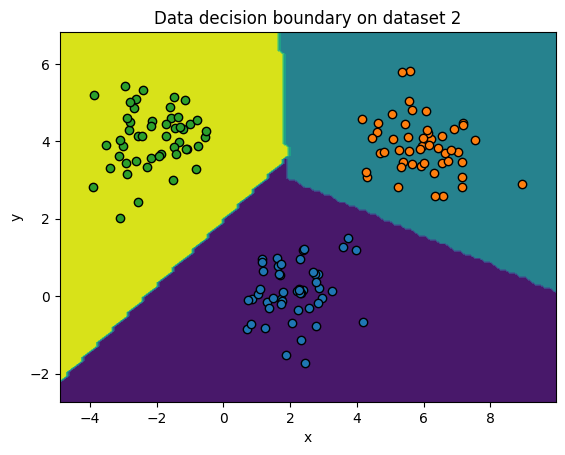

In [52]:
n_samples, centers, cluster_std = dataset_params[1].values()
X, y = make_blobs(n_samples = n_samples, centers = centers, cluster_std = cluster_std)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
clf = svm.SVC(C=1, kernel='linear',probability=True)
clf.fit(X, y)
display = DecisionBoundaryDisplay.from_estimator(clf, X,ax=ax)
for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Data decision boundary on dataset 2')

**3. Plot support vectors (using black cycles), adversarial points (in green) as well as the alteration
between original and altered points as green dotted line.**

/tmp/ipykernel_5456/3039765362.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')


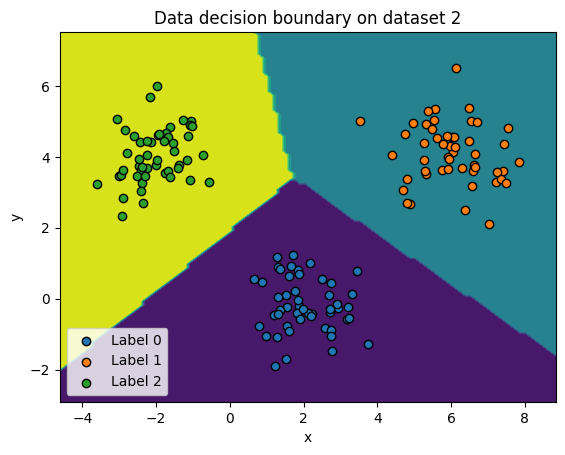

In [67]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
display.plot(ax=ax)
for label in np.unique(y):
    ax.scatter(X[y == label, 0], X[y == label, 1], label=f"Label {label}",cmap=plt.cm.Paired, edgecolors='black')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Data decision boundary on dataset 2')
ax.legend()

array([1])

**4. Bonus: show the linear decision function**